In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv("WildBlueberryPollinationSimulationData.csv")

Now Data understanding and Data cleaning:

In [51]:
print(data.head())

   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0     0       37.5      0.75     0.25     0.25   0.25              86.0   
1     1       37.5      0.75     0.25     0.25   0.25              86.0   
2     2       37.5      0.75     0.25     0.25   0.25              94.6   
3     3       37.5      0.75     0.25     0.25   0.25              94.6   
4     4       37.5      0.75     0.25     0.25   0.25              86.0   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              52.0                  71.9              62.0              30.0   
2              57.2                  79.0              68.2              33.0   
3              57.2                  79.0              68.2              33.0   
4              52.0                  71.9              62.0              30.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  frui

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [53]:
data.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [54]:
data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


# **Feature Engineering**

creating new columns to reduce complexity and introduce efficiency

In [55]:
data['pollinators']=data['honeybee'] + data['bumbles'] + data['andrena'] + data['osmia']

# **Data Visualization:**
(just for myself, to observe the pattern /possible outliers)

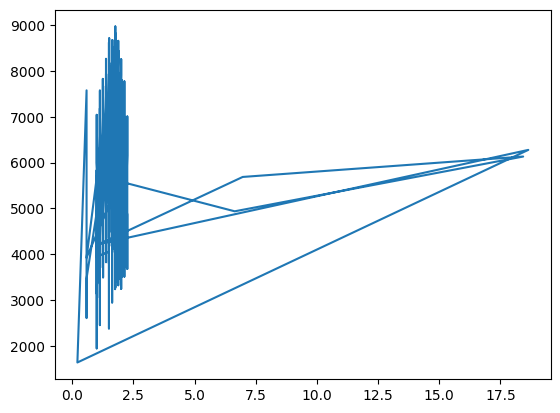

In [56]:
plt.plot(data['pollinators'],data['yield'])

<Axes: xlabel='pollinators', ylabel='yield'>

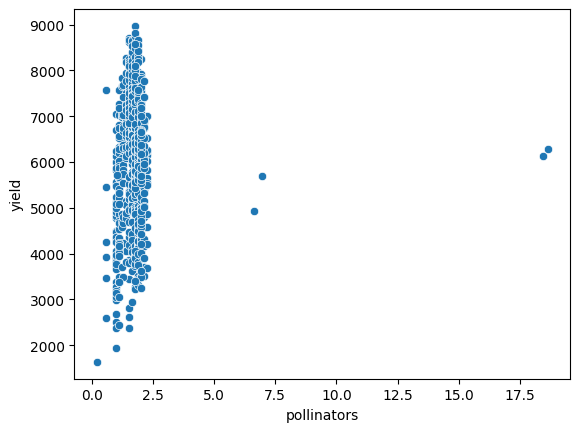

In [57]:
sns.scatterplot(x='pollinators', y='yield', data=data)

# **MODEL IMPLEMENTATION:**

In [58]:
# IMPORTING LIBRARIES:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [59]:
X=X = data.drop(columns=['fruitset','fruitmass','seeds','yield'])
y = data['yield']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42 )

In [60]:
def rmse_calculate(y_test, y_pred):
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return rmse

In [61]:
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error in Linear Regression:", mse)
print("Mean Absolute Error in Linear Regression:", mae)
print("In linear regression RMSE is: ",rmse_calculate(y_test,y_pred))
print("R² Score:", r2)


Mean Squared Error in Linear Regression: 180573.7990714774
Mean Absolute Error in Linear Regression: 344.6698263610027
In linear regression RMSE is:  424.9397593441656
R² Score: 0.9070944514053769


In [62]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error in Decision Tree Regressor:", mse)
print("Mean Absolute Error in Decision Tree Regressor:", mae)
print("In Decision Tree Regressor RMSE is: ",rmse_calculate(y_test,y_pred))
print("R² Score:", r2)

Mean Squared Error in Decision Tree Regressor: 450288.75496130745
Mean Absolute Error in Decision Tree Regressor: 461.55151603532823
In Decision Tree Regressor RMSE is:  671.0355839754756
R² Score: 0.7683256152288707


In [63]:
model_xg= xgb.XGBRegressor(n_estimators=100, max_depth=5,learning_rate=0.1,random_state=42)
model_xg.fit(X_train, y_train)
y_pred=model_xg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error in XGBoost:", mse)
print("Mean Absolute Error in XGBoost:", mae)
print("In XGBoost regressor RMSE is: ",rmse_calculate(y_test,y_pred))
print("R² Score:", r2)

Mean Squared Error in XGBoost: 130804.82330758631
Mean Absolute Error in XGBoost: 195.62405691396236
In XGBoost regressor RMSE is:  361.6694945770051
R² Score: 0.9327006801058461


In [64]:
rfc_model = RandomForestRegressor(n_estimators=100, max_depth=7)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error in Random Forest Regressor:", mse)
print("Mean Absolute Error in Random Forest Regressor:", mae)
print("In Random Forest regressor RMSE is: ",rmse_calculate(y_test,y_pred))
print("R² Score:", r2)

Mean Squared Error in Random Forest Regressor: 248530.54660245316
Mean Absolute Error in Random Forest Regressor: 309.9163672551254
In Random Forest regressor RMSE is:  498.52838093979483
R² Score: 0.872130580995958
